In [1]:
import pandas as pd
import numpy as np
import os

# Create a folder to hold all results
output_dir = "results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def save_cv_scores(scores, cv_mean, scores_path, mean_path):
    """Save CV scores and the mean score to CSV files."""
    df_scores = pd.DataFrame({
        "fold": list(range(1, len(scores)+1)),
        "cv_score": scores
    })
    df_scores.to_csv(scores_path, index=False)
    df_mean = pd.DataFrame({"cv_mean": [cv_mean]})
    df_mean.to_csv(mean_path, index=False)

# Define all results in a dictionary. Each model key contains:
# - "cv_scores": a list of cross-validation scores (if available)
# - "cv_mean": the mean cross-validation score
# - "train_report": classification report for the training set (as a DataFrame)
# - "train_confusion": confusion matrix for training set (DataFrame with index and columns as class labels)
# - similarly for "val_report", "val_confusion", "test_report", "test_confusion"
results = {}

# Baseline: Logistic Regression + TF-IDF
results["baseline"] = {
    "cv_scores": [0.67887449, 0.6722082, 0.69065799, 0.66471172, 0.67489588],
    "cv_mean": 0.6762696572899445,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.81, "recall": 0.98, "f1-score": 0.89, "support": 7541},
         {"label": "1", "precision": 0.94, "recall": 0.57, "f1-score": 0.71, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.84, "support": 11487},
         {"label": "macro avg", "precision": 0.88, "recall": 0.78, "f1-score": 0.80, "support": 11487},
         {"label": "weighted avg", "precision": 0.86, "recall": 0.84, "f1-score": 0.83, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7408, 133], [1688, 2258]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.73, "recall": 0.97, "f1-score": 0.83, "support": 2075},
         {"label": "1", "precision": 0.87, "recall": 0.37, "f1-score": 0.52, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.75, "support": 3257},
         {"label": "macro avg", "precision": 0.80, "recall": 0.67, "f1-score": 0.68, "support": 3257},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.75, "f1-score": 0.72, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2008, 67], [743, 439]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.75, "recall": 0.97, "f1-score": 0.85, "support": 1687},
         {"label": "1", "precision": 0.89, "recall": 0.40, "f1-score": 0.55, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.77, "support": 2600},
         {"label": "macro avg", "precision": 0.82, "recall": 0.69, "f1-score": 0.70, "support": 2600},
         {"label": "weighted avg", "precision": 0.80, "recall": 0.77, "f1-score": 0.74, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1643, 44], [547, 366]], index=["0", "1"], columns=["0", "1"]),
}

# KNN + TF-IDF
results["knn"] = {
    "cv_scores": [0.39977975, 0.40022371, 0.40820958, 0.38911108, 0.40877802],
    "cv_mean": 0.4012204296342684,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.67, "recall": 0.98, "f1-score": 0.80, "support": 7541},
         {"label": "1", "precision": 0.70, "recall": 0.09, "f1-score": 0.15, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.67, "support": 11487},
         {"label": "macro avg", "precision": 0.69, "recall": 0.53, "f1-score": 0.48, "support": 11487},
         {"label": "weighted avg", "precision": 0.68, "recall": 0.67, "f1-score": 0.58, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7395, 146], [3604, 342]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.64, "recall": 0.98, "f1-score": 0.77, "support": 2075},
         {"label": "1", "precision": 0.43, "recall": 0.03, "f1-score": 0.06, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.63, "support": 3257},
         {"label": "macro avg", "precision": 0.53, "recall": 0.50, "f1-score": 0.42, "support": 3257},
         {"label": "weighted avg", "precision": 0.56, "recall": 0.63, "f1-score": 0.51, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2024, 51], [1144, 38]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.65, "recall": 0.97, "f1-score": 0.78, "support": 1687},
         {"label": "1", "precision": 0.47, "recall": 0.05, "f1-score": 0.09, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.65, "support": 2600},
         {"label": "macro avg", "precision": 0.56, "recall": 0.51, "f1-score": 0.44, "support": 2600},
         {"label": "weighted avg", "precision": 0.59, "recall": 0.65, "f1-score": 0.54, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1635, 52], [867, 46]], index=["0", "1"], columns=["0", "1"]),
}

# Multinomial Naive Bayes Classifier
results["mnb"] = {
    "cv_scores": [0.42259069, 0.41886949, 0.42067236, 0.41584924, 0.41454145],
    "cv_mean": 0.41850464756880407,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.67, "recall": 1.00, "f1-score": 0.80, "support": 7541},
         {"label": "1", "precision": 0.98, "recall": 0.07, "f1-score": 0.13, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.68, "support": 11487},
         {"label": "macro avg", "precision": 0.82, "recall": 0.54, "f1-score": 0.47, "support": 11487},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.68, "f1-score": 0.57, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7534, 7], [3663, 283]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.65, "recall": 1.00, "f1-score": 0.79, "support": 2075},
         {"label": "1", "precision": 0.95, "recall": 0.05, "f1-score": 0.09, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.65, "support": 3257},
         {"label": "macro avg", "precision": 0.80, "recall": 0.52, "f1-score": 0.44, "support": 3257},
         {"label": "weighted avg", "precision": 0.76, "recall": 0.65, "f1-score": 0.53, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2072, 3], [1124, 58]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.65, "recall": 1.00, "f1-score": 0.79, "support": 1687},
         {"label": "1", "precision": 1.00, "recall": 0.02, "f1-score": 0.04, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.66, "support": 2600},
         {"label": "macro avg", "precision": 0.83, "recall": 0.51, "f1-score": 0.41, "support": 2600},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.66, "f1-score": 0.53, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1687, 0], [895, 18]], index=["0", "1"], columns=["0", "1"]),
}

# GridSearchCV + alpha + Multinomial Naive Bayes Classifier + TF-IDF
results["grid_mnb"] = {
    "best_alpha": 0.1,
    # CV scores per fold are not provided here, only the mean
    "cv_scores": [],
    "cv_mean": 0.5423436706182134,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.82, "recall": 0.95, "f1-score": 0.88, "support": 7541},
         {"label": "1", "precision": 0.87, "recall": 0.61, "f1-score": 0.72, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.84, "support": 11487},
         {"label": "macro avg", "precision": 0.85, "recall": 0.78, "f1-score": 0.80, "support": 11487},
         {"label": "weighted avg", "precision": 0.84, "recall": 0.84, "f1-score": 0.83, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7194, 347], [1543, 2403]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.74, "recall": 0.97, "f1-score": 0.84, "support": 2075},
         {"label": "1", "precision": 0.87, "recall": 0.40, "f1-score": 0.55, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.76, "support": 3257},
         {"label": "macro avg", "precision": 0.80, "recall": 0.68, "f1-score": 0.69, "support": 3257},
         {"label": "weighted avg", "precision": 0.79, "recall": 0.76, "f1-score": 0.73, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2005, 70], [712, 470]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.73, "recall": 0.97, "f1-score": 0.84, "support": 1687},
         {"label": "1", "precision": 0.88, "recall": 0.34, "f1-score": 0.49, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.75, "support": 2600},
         {"label": "macro avg", "precision": 0.80, "recall": 0.66, "f1-score": 0.66, "support": 2600},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.75, "f1-score": 0.71, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1643, 44], [605, 308]], index=["0", "1"], columns=["0", "1"]),
}

# Complement Naive Bayes + TF-IDF
results["complement_nb"] = {
    "cv_scores": [0.48632078, 0.50805709, 0.49582183, 0.50031821, 0.49875823],
    "cv_mean": 0.4978552285260798,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.74, "recall": 0.97, "f1-score": 0.84, "support": 7541},
         {"label": "1", "precision": 0.86, "recall": 0.34, "f1-score": 0.49, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.75, "support": 11487},
         {"label": "macro avg", "precision": 0.80, "recall": 0.65, "f1-score": 0.66, "support": 11487},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.75, "f1-score": 0.72, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7314, 227], [2604, 1342]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.70, "recall": 0.97, "f1-score": 0.82, "support": 2075},
         {"label": "1", "precision": 0.85, "recall": 0.28, "f1-score": 0.42, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.72, "support": 3257},
         {"label": "macro avg", "precision": 0.78, "recall": 0.63, "f1-score": 0.62, "support": 3257},
         {"label": "weighted avg", "precision": 0.76, "recall": 0.72, "f1-score": 0.67, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2015, 60], [850, 332]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.69, "recall": 0.98, "f1-score": 0.81, "support": 1687},
         {"label": "1", "precision": 0.86, "recall": 0.18, "f1-score": 0.29, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.70, "support": 2600},
         {"label": "macro avg", "precision": 0.77, "recall": 0.58, "f1-score": 0.55, "support": 2600},
         {"label": "weighted avg", "precision": 0.75, "recall": 0.70, "f1-score": 0.63, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1660, 27], [751, 162]], index=["0", "1"], columns=["0", "1"]),
}

# Random Forest + TF-IDF
results["random_forest"] = {
    "cv_scores": [0.80835809, 0.79637566, 0.80132451, 0.79775055, 0.80119626],
    "cv_mean": 0.8010010149435903,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 7541},
         {"label": "1", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 1.00, "support": 11487},
         {"label": "macro avg", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 11487},
         {"label": "weighted avg", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7541, 0], [0, 3946]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.87, "recall": 0.94, "f1-score": 0.91, "support": 2075},
         {"label": "1", "precision": 0.89, "recall": 0.76, "f1-score": 0.82, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.88, "support": 3257},
         {"label": "macro avg", "precision": 0.88, "recall": 0.85, "f1-score": 0.86, "support": 3257},
         {"label": "weighted avg", "precision": 0.88, "recall": 0.88, "f1-score": 0.87, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[1959, 116], [287, 895]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.86, "recall": 0.96, "f1-score": 0.91, "support": 1687},
         {"label": "1", "precision": 0.91, "recall": 0.71, "f1-score": 0.80, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.87, "support": 2600},
         {"label": "macro avg", "precision": 0.89, "recall": 0.84, "f1-score": 0.85, "support": 2600},
         {"label": "weighted avg", "precision": 0.88, "recall": 0.87, "f1-score": 0.87, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1626, 61], [266, 647]], index=["0", "1"], columns=["0", "1"]),
}

# Support Vector Machine + TF-IDF
results["svm"] = {
    "cv_scores": [0.81566412, 0.81044985, 0.81492767, 0.80775218, 0.80864473],
    "cv_mean": 0.811487710117839,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.97, "recall": 0.99, "f1-score": 0.98, "support": 7541},
         {"label": "1", "precision": 0.99, "recall": 0.93, "f1-score": 0.96, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.97, "support": 11487},
         {"label": "macro avg", "precision": 0.98, "recall": 0.96, "f1-score": 0.97, "support": 11487},
         {"label": "weighted avg", "precision": 0.97, "recall": 0.97, "f1-score": 0.97, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7491, 50], [267, 3679]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.84, "recall": 0.95, "f1-score": 0.89, "support": 2075},
         {"label": "1", "precision": 0.88, "recall": 0.67, "f1-score": 0.76, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.85, "support": 3257},
         {"label": "macro avg", "precision": 0.86, "recall": 0.81, "f1-score": 0.83, "support": 3257},
         {"label": "weighted avg", "precision": 0.85, "recall": 0.85, "f1-score": 0.84, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[1969, 106], [387, 795]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.84, "recall": 0.95, "f1-score": 0.89, "support": 1687},
         {"label": "1", "precision": 0.89, "recall": 0.66, "f1-score": 0.76, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.85, "support": 2600},
         {"label": "macro avg", "precision": 0.86, "recall": 0.81, "f1-score": 0.83, "support": 2600},
         {"label": "weighted avg", "precision": 0.86, "recall": 0.85, "f1-score": 0.85, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1610, 77], [308, 605]], index=["0", "1"], columns=["0", "1"]),
}

# Save all data to CSV files for each model
for model_name, data in results.items():
    model_dir = os.path.join(output_dir, model_name)
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # Save cross-validation scores (if available)
    if "cv_scores" in data and data["cv_scores"]:
        save_cv_scores(
            data["cv_scores"],
            data["cv_mean"],
            os.path.join(model_dir, "/Users/tarekbouhairi/Desktop/Universitat Passau/Advertismenet in RAG/Ad-Detection/Visualizations/cv_scores.csv"),
            os.path.join(model_dir, "/Users/tarekbouhairi/Desktop/Universitat Passau/Advertismenet in RAG/Ad-Detection/Visualizations/cv_mean.csv")
        )
    
    # Save training set report and confusion matrix
    data["train_report"].to_csv(os.path.join(model_dir, "/Users/tarekbouhairi/Desktop/Universitat Passau/Advertismenet in RAG/Ad-Detection/Visualizations/train_report.csv"), index=False)
    data["train_confusion"].to_csv(os.path.join(model_dir, "/Users/tarekbouhairi/Desktop/Universitat Passau/Advertismenet in RAG/Ad-Detection/Visualizations/train_confusion.csv"))
    
    # Save validation set report and confusion matrix
    data["val_report"].to_csv(os.path.join(model_dir, "/Users/tarekbouhairi/Desktop/Universitat Passau/Advertismenet in RAG/Ad-Detection/Visualizations/val_report.csv"), index=False)
    data["val_confusion"].to_csv(os.path.join(model_dir, "/Users/tarekbouhairi/Desktop/Universitat Passau/Advertismenet in RAG/Ad-Detection/Visualizations/val_confusion.csv"))
    
    # Save test set report and confusion matrix
    data["test_report"].to_csv(os.path.join(model_dir, "/Users/tarekbouhairi/Desktop/Universitat Passau/Advertismenet in RAG/Ad-Detection/Visualizations/test_report.csv"), index=False)
    data["test_confusion"].to_csv(os.path.join(model_dir, "/Users/tarekbouhairi/Desktop/Universitat Passau/Advertismenet in RAG/Ad-Detection/Visualizations/test_confusion.csv"))

print("CSV files have been saved in the 'results' directory.")


CSV files have been saved in the 'results' directory.


In [2]:
import pandas as pd
import numpy as np
import os

# Create a folder to hold all results
output_dir = "results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def save_cv_scores(scores, cv_mean, scores_path, mean_path):
    """Save CV scores and the mean score to CSV files."""
    df_scores = pd.DataFrame({
        "fold": list(range(1, len(scores)+1)),
        "cv_score": scores
    })
    df_scores.to_csv(scores_path, index=False)
    df_mean = pd.DataFrame({"cv_mean": [cv_mean]})
    df_mean.to_csv(mean_path, index=False)

# Define all results in a dictionary for all ML models
results = {}

# Baseline: Logistic Regression + TF-IDF
results["baseline"] = {
    "cv_scores": [0.67887449, 0.6722082, 0.69065799, 0.66471172, 0.67489588],
    "cv_mean": 0.6762696572899445,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.81, "recall": 0.98, "f1-score": 0.89, "support": 7541},
         {"label": "1", "precision": 0.94, "recall": 0.57, "f1-score": 0.71, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.84, "support": 11487},
         {"label": "macro avg", "precision": 0.88, "recall": 0.78, "f1-score": 0.80, "support": 11487},
         {"label": "weighted avg", "precision": 0.86, "recall": 0.84, "f1-score": 0.83, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7408, 133], [1688, 2258]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.73, "recall": 0.97, "f1-score": 0.83, "support": 2075},
         {"label": "1", "precision": 0.87, "recall": 0.37, "f1-score": 0.52, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.75, "support": 3257},
         {"label": "macro avg", "precision": 0.80, "recall": 0.67, "f1-score": 0.68, "support": 3257},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.75, "f1-score": 0.72, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2008, 67], [743, 439]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.75, "recall": 0.97, "f1-score": 0.85, "support": 1687},
         {"label": "1", "precision": 0.89, "recall": 0.40, "f1-score": 0.55, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.77, "support": 2600},
         {"label": "macro avg", "precision": 0.82, "recall": 0.69, "f1-score": 0.70, "support": 2600},
         {"label": "weighted avg", "precision": 0.80, "recall": 0.77, "f1-score": 0.74, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1643, 44], [547, 366]], index=["0", "1"], columns=["0", "1"]),
}

# KNN + TF-IDF
results["knn"] = {
    "cv_scores": [0.39977975, 0.40022371, 0.40820958, 0.38911108, 0.40877802],
    "cv_mean": 0.4012204296342684,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.67, "recall": 0.98, "f1-score": 0.80, "support": 7541},
         {"label": "1", "precision": 0.70, "recall": 0.09, "f1-score": 0.15, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.67, "support": 11487},
         {"label": "macro avg", "precision": 0.69, "recall": 0.53, "f1-score": 0.48, "support": 11487},
         {"label": "weighted avg", "precision": 0.68, "recall": 0.67, "f1-score": 0.58, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7395, 146], [3604, 342]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.64, "recall": 0.98, "f1-score": 0.77, "support": 2075},
         {"label": "1", "precision": 0.43, "recall": 0.03, "f1-score": 0.06, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.63, "support": 3257},
         {"label": "macro avg", "precision": 0.53, "recall": 0.50, "f1-score": 0.42, "support": 3257},
         {"label": "weighted avg", "precision": 0.56, "recall": 0.63, "f1-score": 0.51, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2024, 51], [1144, 38]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.65, "recall": 0.97, "f1-score": 0.78, "support": 1687},
         {"label": "1", "precision": 0.47, "recall": 0.05, "f1-score": 0.09, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.65, "support": 2600},
         {"label": "macro avg", "precision": 0.56, "recall": 0.51, "f1-score": 0.44, "support": 2600},
         {"label": "weighted avg", "precision": 0.59, "recall": 0.65, "f1-score": 0.54, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1635, 52], [867, 46]], index=["0", "1"], columns=["0", "1"]),
}

# Multinomial Naive Bayes Classifier
results["mnb"] = {
    "cv_scores": [0.42259069, 0.41886949, 0.42067236, 0.41584924, 0.41454145],
    "cv_mean": 0.41850464756880407,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.67, "recall": 1.00, "f1-score": 0.80, "support": 7541},
         {"label": "1", "precision": 0.98, "recall": 0.07, "f1-score": 0.13, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.68, "support": 11487},
         {"label": "macro avg", "precision": 0.82, "recall": 0.54, "f1-score": 0.47, "support": 11487},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.68, "f1-score": 0.57, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7534, 7], [3663, 283]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.65, "recall": 1.00, "f1-score": 0.79, "support": 2075},
         {"label": "1", "precision": 0.95, "recall": 0.05, "f1-score": 0.09, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.65, "support": 3257},
         {"label": "macro avg", "precision": 0.80, "recall": 0.52, "f1-score": 0.44, "support": 3257},
         {"label": "weighted avg", "precision": 0.76, "recall": 0.65, "f1-score": 0.53, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2072, 3], [1124, 58]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.65, "recall": 1.00, "f1-score": 0.79, "support": 1687},
         {"label": "1", "precision": 1.00, "recall": 0.02, "f1-score": 0.04, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.66, "support": 2600},
         {"label": "macro avg", "precision": 0.83, "recall": 0.51, "f1-score": 0.41, "support": 2600},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.66, "f1-score": 0.53, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1687, 0], [895, 18]], index=["0", "1"], columns=["0", "1"]),
}

# GridSearchCV + alpha + Multinomial Naive Bayes Classifier + TF-IDF
results["grid_mnb"] = {
    "best_alpha": 0.1,
    "cv_scores": [],
    "cv_mean": 0.5423436706182134,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.82, "recall": 0.95, "f1-score": 0.88, "support": 7541},
         {"label": "1", "precision": 0.87, "recall": 0.61, "f1-score": 0.72, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.84, "support": 11487},
         {"label": "macro avg", "precision": 0.85, "recall": 0.78, "f1-score": 0.80, "support": 11487},
         {"label": "weighted avg", "precision": 0.84, "recall": 0.84, "f1-score": 0.83, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7194, 347], [1543, 2403]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.74, "recall": 0.97, "f1-score": 0.84, "support": 2075},
         {"label": "1", "precision": 0.87, "recall": 0.40, "f1-score": 0.55, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.76, "support": 3257},
         {"label": "macro avg", "precision": 0.80, "recall": 0.68, "f1-score": 0.69, "support": 3257},
         {"label": "weighted avg", "precision": 0.79, "recall": 0.76, "f1-score": 0.73, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2005, 70], [712, 470]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.73, "recall": 0.97, "f1-score": 0.84, "support": 1687},
         {"label": "1", "precision": 0.88, "recall": 0.34, "f1-score": 0.49, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.75, "support": 2600},
         {"label": "macro avg", "precision": 0.80, "recall": 0.66, "f1-score": 0.66, "support": 2600},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.75, "f1-score": 0.71, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1643, 44], [605, 308]], index=["0", "1"], columns=["0", "1"]),
}

# Complement Naive Bayes + TF-IDF
results["complement_nb"] = {
    "cv_scores": [0.48632078, 0.50805709, 0.49582183, 0.50031821, 0.49875823],
    "cv_mean": 0.4978552285260798,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.74, "recall": 0.97, "f1-score": 0.84, "support": 7541},
         {"label": "1", "precision": 0.86, "recall": 0.34, "f1-score": 0.49, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.75, "support": 11487},
         {"label": "macro avg", "precision": 0.80, "recall": 0.65, "f1-score": 0.66, "support": 11487},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.75, "f1-score": 0.72, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7314, 227], [2604, 1342]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.70, "recall": 0.97, "f1-score": 0.82, "support": 2075},
         {"label": "1", "precision": 0.85, "recall": 0.28, "f1-score": 0.42, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.72, "support": 3257},
         {"label": "macro avg", "precision": 0.78, "recall": 0.63, "f1-score": 0.62, "support": 3257},
         {"label": "weighted avg", "precision": 0.76, "recall": 0.72, "f1-score": 0.67, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2015, 60], [850, 332]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.69, "recall": 0.98, "f1-score": 0.81, "support": 1687},
         {"label": "1", "precision": 0.86, "recall": 0.18, "f1-score": 0.29, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.70, "support": 2600},
         {"label": "macro avg", "precision": 0.77, "recall": 0.58, "f1-score": 0.55, "support": 2600},
         {"label": "weighted avg", "precision": 0.75, "recall": 0.70, "f1-score": 0.63, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1660, 27], [751, 162]], index=["0", "1"], columns=["0", "1"]),
}

# Random Forest + TF-IDF
results["random_forest"] = {
    "cv_scores": [0.80835809, 0.79637566, 0.80132451, 0.79775055, 0.80119626],
    "cv_mean": 0.8010010149435903,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 7541},
         {"label": "1", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 1.00, "support": 11487},
         {"label": "macro avg", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 11487},
         {"label": "weighted avg", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7541, 0], [0, 3946]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.87, "recall": 0.94, "f1-score": 0.91, "support": 2075},
         {"label": "1", "precision": 0.89, "recall": 0.76, "f1-score": 0.82, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.88, "support": 3257},
         {"label": "macro avg", "precision": 0.88, "recall": 0.85, "f1-score": 0.86, "support": 3257},
         {"label": "weighted avg", "precision": 0.88, "recall": 0.88, "f1-score": 0.87, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[1959, 116], [287, 895]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.86, "recall": 0.96, "f1-score": 0.91, "support": 1687},
         {"label": "1", "precision": 0.91, "recall": 0.71, "f1-score": 0.80, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.87, "support": 2600},
         {"label": "macro avg", "precision": 0.89, "recall": 0.84, "f1-score": 0.85, "support": 2600},
         {"label": "weighted avg", "precision": 0.88, "recall": 0.87, "f1-score": 0.87, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1626, 61], [266, 647]], index=["0", "1"], columns=["0", "1"]),
}

# Support Vector Machine + TF-IDF
results["svm"] = {
    "cv_scores": [0.81566412, 0.81044985, 0.81492767, 0.80775218, 0.80864473],
    "cv_mean": 0.811487710117839,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.97, "recall": 0.99, "f1-score": 0.98, "support": 7541},
         {"label": "1", "precision": 0.99, "recall": 0.93, "f1-score": 0.96, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.97, "support": 11487},
         {"label": "macro avg", "precision": 0.98, "recall": 0.96, "f1-score": 0.97, "support": 11487},
         {"label": "weighted avg", "precision": 0.97, "recall": 0.97, "f1-score": 0.97, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7491, 50], [267, 3679]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.84, "recall": 0.95, "f1-score": 0.89, "support": 2075},
         {"label": "1", "precision": 0.88, "recall": 0.67, "f1-score": 0.76, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.85, "support": 3257},
         {"label": "macro avg", "precision": 0.86, "recall": 0.81, "f1-score": 0.83, "support": 3257},
         {"label": "weighted avg", "precision": 0.85, "recall": 0.85, "f1-score": 0.84, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[1969, 106], [387, 795]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.84, "recall": 0.95, "f1-score": 0.89, "support": 1687},
         {"label": "1", "precision": 0.89, "recall": 0.66, "f1-score": 0.76, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.85, "support": 2600},
         {"label": "macro avg", "precision": 0.86, "recall": 0.81, "f1-score": 0.83, "support": 2600},
         {"label": "weighted avg", "precision": 0.86, "recall": 0.85, "f1-score": 0.85, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1610, 77], [308, 605]], index=["0", "1"], columns=["0", "1"]),
}

# Save all data to CSV files for each model
for model_name, data in results.items():
    model_dir = os.path.join(output_dir, model_name)
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # Save cross-validation scores (if available)
    if "cv_scores" in data and data["cv_scores"]:
        save_cv_scores(
            data["cv_scores"],
            data["cv_mean"],
            os.path.join(model_dir, "cv_scores.csv"),
            os.path.join(model_dir, "cv_mean.csv")
        )
    
    # Save training set report and confusion matrix
    data["train_report"].to_csv(os.path.join(model_dir, "train_report.csv"), index=False)
    data["train_confusion"].to_csv(os.path.join(model_dir, "train_confusion.csv"))
    
    # Save validation set report and confusion matrix
    data["val_report"].to_csv(os.path.join(model_dir, "val_report.csv"), index=False)
    data["val_confusion"].to_csv(os.path.join(model_dir, "val_confusion.csv"))
    
    # Save test set report and confusion matrix
    data["test_report"].to_csv(os.path.join(model_dir, "test_report.csv"), index=False)
    data["test_confusion"].to_csv(os.path.join(model_dir, "test_confusion.csv"))

# Combine evaluation reports for all models into a single CSV file
all_reports = []

for model_name, model_data in results.items():
    # For training report
    train_report = model_data["train_report"].copy()
    train_report["dataset"] = "train"
    train_report["model"] = model_name
    all_reports.append(train_report)
    
    # For validation report
    val_report = model_data["val_report"].copy()
    val_report["dataset"] = "validation"
    val_report["model"] = model_name
    all_reports.append(val_report)
    
    # For test report
    test_report = model_data["test_report"].copy()
    test_report["dataset"] = "test"
    test_report["model"] = model_name
    all_reports.append(test_report)

# Combine all reports into one DataFrame
combined_report = pd.concat(all_reports, ignore_index=True)

# Save the combined DataFrame to a CSV file
combined_csv_path = os.path.join(output_dir, "all_ml_models_evaluation_report.csv")
combined_report.to_csv(combined_csv_path, index=False)

print("CSV files have been saved in the 'results' directory.")


CSV files have been saved in the 'results' directory.


In [3]:
import pandas as pd
import numpy as np
import os

# Create a folder to hold all results
output_dir = "results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def save_cv_scores(scores, cv_mean, scores_path, mean_path):
    """Save CV scores and the mean score to CSV files."""
    df_scores = pd.DataFrame({
        "fold": list(range(1, len(scores)+1)),
        "cv_score": scores
    })
    df_scores.to_csv(scores_path, index=False)
    df_mean = pd.DataFrame({"cv_mean": [cv_mean]})
    df_mean.to_csv(mean_path, index=False)

# Define all results in a dictionary for all ML models
results = {}

# Baseline: Logistic Regression + TF-IDF
results["baseline"] = {
    "cv_scores": [0.67887449, 0.6722082, 0.69065799, 0.66471172, 0.67489588],
    "cv_mean": 0.6762696572899445,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.81, "recall": 0.98, "f1-score": 0.89, "support": 7541},
         {"label": "1", "precision": 0.94, "recall": 0.57, "f1-score": 0.71, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.84, "support": 11487},
         {"label": "macro avg", "precision": 0.88, "recall": 0.78, "f1-score": 0.80, "support": 11487},
         {"label": "weighted avg", "precision": 0.86, "recall": 0.84, "f1-score": 0.83, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7408, 133], [1688, 2258]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.73, "recall": 0.97, "f1-score": 0.83, "support": 2075},
         {"label": "1", "precision": 0.87, "recall": 0.37, "f1-score": 0.52, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.75, "support": 3257},
         {"label": "macro avg", "precision": 0.80, "recall": 0.67, "f1-score": 0.68, "support": 3257},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.75, "f1-score": 0.72, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2008, 67], [743, 439]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.75, "recall": 0.97, "f1-score": 0.85, "support": 1687},
         {"label": "1", "precision": 0.89, "recall": 0.40, "f1-score": 0.55, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.77, "support": 2600},
         {"label": "macro avg", "precision": 0.82, "recall": 0.69, "f1-score": 0.70, "support": 2600},
         {"label": "weighted avg", "precision": 0.80, "recall": 0.77, "f1-score": 0.74, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1643, 44], [547, 366]], index=["0", "1"], columns=["0", "1"]),
}

# KNN + TF-IDF
results["knn"] = {
    "cv_scores": [0.39977975, 0.40022371, 0.40820958, 0.38911108, 0.40877802],
    "cv_mean": 0.4012204296342684,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.67, "recall": 0.98, "f1-score": 0.80, "support": 7541},
         {"label": "1", "precision": 0.70, "recall": 0.09, "f1-score": 0.15, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.67, "support": 11487},
         {"label": "macro avg", "precision": 0.69, "recall": 0.53, "f1-score": 0.48, "support": 11487},
         {"label": "weighted avg", "precision": 0.68, "recall": 0.67, "f1-score": 0.58, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7395, 146], [3604, 342]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.64, "recall": 0.98, "f1-score": 0.77, "support": 2075},
         {"label": "1", "precision": 0.43, "recall": 0.03, "f1-score": 0.06, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.63, "support": 3257},
         {"label": "macro avg", "precision": 0.53, "recall": 0.50, "f1-score": 0.42, "support": 3257},
         {"label": "weighted avg", "precision": 0.56, "recall": 0.63, "f1-score": 0.51, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2024, 51], [1144, 38]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.65, "recall": 0.97, "f1-score": 0.78, "support": 1687},
         {"label": "1", "precision": 0.47, "recall": 0.05, "f1-score": 0.09, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.65, "support": 2600},
         {"label": "macro avg", "precision": 0.56, "recall": 0.51, "f1-score": 0.44, "support": 2600},
         {"label": "weighted avg", "precision": 0.59, "recall": 0.65, "f1-score": 0.54, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1635, 52], [867, 46]], index=["0", "1"], columns=["0", "1"]),
}

# Multinomial Naive Bayes Classifier
results["mnb"] = {
    "cv_scores": [0.42259069, 0.41886949, 0.42067236, 0.41584924, 0.41454145],
    "cv_mean": 0.41850464756880407,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.67, "recall": 1.00, "f1-score": 0.80, "support": 7541},
         {"label": "1", "precision": 0.98, "recall": 0.07, "f1-score": 0.13, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.68, "support": 11487},
         {"label": "macro avg", "precision": 0.82, "recall": 0.54, "f1-score": 0.47, "support": 11487},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.68, "f1-score": 0.57, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7534, 7], [3663, 283]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.65, "recall": 1.00, "f1-score": 0.79, "support": 2075},
         {"label": "1", "precision": 0.95, "recall": 0.05, "f1-score": 0.09, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.65, "support": 3257},
         {"label": "macro avg", "precision": 0.80, "recall": 0.52, "f1-score": 0.44, "support": 3257},
         {"label": "weighted avg", "precision": 0.76, "recall": 0.65, "f1-score": 0.53, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2072, 3], [1124, 58]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.65, "recall": 1.00, "f1-score": 0.79, "support": 1687},
         {"label": "1", "precision": 1.00, "recall": 0.02, "f1-score": 0.04, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.66, "support": 2600},
         {"label": "macro avg", "precision": 0.83, "recall": 0.51, "f1-score": 0.41, "support": 2600},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.66, "f1-score": 0.53, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1687, 0], [895, 18]], index=["0", "1"], columns=["0", "1"]),
}

# GridSearchCV + alpha + Multinomial Naive Bayes Classifier + TF-IDF
results["grid_mnb"] = {
    "best_alpha": 0.1,
    "cv_scores": [],
    "cv_mean": 0.5423436706182134,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.82, "recall": 0.95, "f1-score": 0.88, "support": 7541},
         {"label": "1", "precision": 0.87, "recall": 0.61, "f1-score": 0.72, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.84, "support": 11487},
         {"label": "macro avg", "precision": 0.85, "recall": 0.78, "f1-score": 0.80, "support": 11487},
         {"label": "weighted avg", "precision": 0.84, "recall": 0.84, "f1-score": 0.83, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7194, 347], [1543, 2403]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.74, "recall": 0.97, "f1-score": 0.84, "support": 2075},
         {"label": "1", "precision": 0.87, "recall": 0.40, "f1-score": 0.55, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.76, "support": 3257},
         {"label": "macro avg", "precision": 0.80, "recall": 0.68, "f1-score": 0.69, "support": 3257},
         {"label": "weighted avg", "precision": 0.79, "recall": 0.76, "f1-score": 0.73, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2005, 70], [712, 470]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.73, "recall": 0.97, "f1-score": 0.84, "support": 1687},
         {"label": "1", "precision": 0.88, "recall": 0.34, "f1-score": 0.49, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.75, "support": 2600},
         {"label": "macro avg", "precision": 0.80, "recall": 0.66, "f1-score": 0.66, "support": 2600},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.75, "f1-score": 0.71, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1643, 44], [605, 308]], index=["0", "1"], columns=["0", "1"]),
}

# Complement Naive Bayes + TF-IDF
results["complement_nb"] = {
    "cv_scores": [0.48632078, 0.50805709, 0.49582183, 0.50031821, 0.49875823],
    "cv_mean": 0.4978552285260798,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.74, "recall": 0.97, "f1-score": 0.84, "support": 7541},
         {"label": "1", "precision": 0.86, "recall": 0.34, "f1-score": 0.49, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.75, "support": 11487},
         {"label": "macro avg", "precision": 0.80, "recall": 0.65, "f1-score": 0.66, "support": 11487},
         {"label": "weighted avg", "precision": 0.78, "recall": 0.75, "f1-score": 0.72, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7314, 227], [2604, 1342]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.70, "recall": 0.97, "f1-score": 0.82, "support": 2075},
         {"label": "1", "precision": 0.85, "recall": 0.28, "f1-score": 0.42, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.72, "support": 3257},
         {"label": "macro avg", "precision": 0.78, "recall": 0.63, "f1-score": 0.62, "support": 3257},
         {"label": "weighted avg", "precision": 0.76, "recall": 0.72, "f1-score": 0.67, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[2015, 60], [850, 332]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.69, "recall": 0.98, "f1-score": 0.81, "support": 1687},
         {"label": "1", "precision": 0.86, "recall": 0.18, "f1-score": 0.29, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.70, "support": 2600},
         {"label": "macro avg", "precision": 0.77, "recall": 0.58, "f1-score": 0.55, "support": 2600},
         {"label": "weighted avg", "precision": 0.75, "recall": 0.70, "f1-score": 0.63, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1660, 27], [751, 162]], index=["0", "1"], columns=["0", "1"]),
}

# Random Forest + TF-IDF
results["random_forest"] = {
    "cv_scores": [0.80835809, 0.79637566, 0.80132451, 0.79775055, 0.80119626],
    "cv_mean": 0.8010010149435903,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 7541},
         {"label": "1", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 1.00, "support": 11487},
         {"label": "macro avg", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 11487},
         {"label": "weighted avg", "precision": 1.00, "recall": 1.00, "f1-score": 1.00, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7541, 0], [0, 3946]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.87, "recall": 0.94, "f1-score": 0.91, "support": 2075},
         {"label": "1", "precision": 0.89, "recall": 0.76, "f1-score": 0.82, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.88, "support": 3257},
         {"label": "macro avg", "precision": 0.88, "recall": 0.85, "f1-score": 0.86, "support": 3257},
         {"label": "weighted avg", "precision": 0.88, "recall": 0.88, "f1-score": 0.87, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[1959, 116], [287, 895]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.86, "recall": 0.96, "f1-score": 0.91, "support": 1687},
         {"label": "1", "precision": 0.91, "recall": 0.71, "f1-score": 0.80, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.87, "support": 2600},
         {"label": "macro avg", "precision": 0.89, "recall": 0.84, "f1-score": 0.85, "support": 2600},
         {"label": "weighted avg", "precision": 0.88, "recall": 0.87, "f1-score": 0.87, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1626, 61], [266, 647]], index=["0", "1"], columns=["0", "1"]),
}

# Support Vector Machine + TF-IDF
results["svm"] = {
    "cv_scores": [0.81566412, 0.81044985, 0.81492767, 0.80775218, 0.80864473],
    "cv_mean": 0.811487710117839,
    "train_report": pd.DataFrame([
         {"label": "0", "precision": 0.97, "recall": 0.99, "f1-score": 0.98, "support": 7541},
         {"label": "1", "precision": 0.99, "recall": 0.93, "f1-score": 0.96, "support": 3946},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.97, "support": 11487},
         {"label": "macro avg", "precision": 0.98, "recall": 0.96, "f1-score": 0.97, "support": 11487},
         {"label": "weighted avg", "precision": 0.97, "recall": 0.97, "f1-score": 0.97, "support": 11487},
    ]),
    "train_confusion": pd.DataFrame([[7491, 50], [267, 3679]], index=["0", "1"], columns=["0", "1"]),
    "val_report": pd.DataFrame([
         {"label": "0", "precision": 0.84, "recall": 0.95, "f1-score": 0.89, "support": 2075},
         {"label": "1", "precision": 0.88, "recall": 0.67, "f1-score": 0.76, "support": 1182},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.85, "support": 3257},
         {"label": "macro avg", "precision": 0.86, "recall": 0.81, "f1-score": 0.83, "support": 3257},
         {"label": "weighted avg", "precision": 0.85, "recall": 0.85, "f1-score": 0.84, "support": 3257},
    ]),
    "val_confusion": pd.DataFrame([[1969, 106], [387, 795]], index=["0", "1"], columns=["0", "1"]),
    "test_report": pd.DataFrame([
         {"label": "0", "precision": 0.84, "recall": 0.95, "f1-score": 0.89, "support": 1687},
         {"label": "1", "precision": 0.89, "recall": 0.66, "f1-score": 0.76, "support": 913},
         {"label": "accuracy", "precision": np.nan, "recall": np.nan, "f1-score": 0.85, "support": 2600},
         {"label": "macro avg", "precision": 0.86, "recall": 0.81, "f1-score": 0.83, "support": 2600},
         {"label": "weighted avg", "precision": 0.86, "recall": 0.85, "f1-score": 0.85, "support": 2600},
    ]),
    "test_confusion": pd.DataFrame([[1610, 77], [308, 605]], index=["0", "1"], columns=["0", "1"]),
}

# Save individual model reports
for model_name, data in results.items():
    model_dir = os.path.join(output_dir, model_name)
    if not os.path.exists(model_dir):
        os.makedirs(model_dir)
    
    # Save CV scores if available
    if "cv_scores" in data and data["cv_scores"]:
        save_cv_scores(
            data["cv_scores"],
            data["cv_mean"],
            os.path.join(model_dir, "cv_scores.csv"),
            os.path.join(model_dir, "cv_mean.csv")
        )
    
    # Save training reports
    data["train_report"].to_csv(os.path.join(model_dir, "train_report.csv"), index=False)
    data["train_confusion"].to_csv(os.path.join(model_dir, "train_confusion.csv"))
    
    # Save validation reports
    data["val_report"].to_csv(os.path.join(model_dir, "val_report.csv"), index=False)
    data["val_confusion"].to_csv(os.path.join(model_dir, "val_confusion.csv"))
    
    # Save test reports
    data["test_report"].to_csv(os.path.join(model_dir, "test_report.csv"), index=False)
    data["test_confusion"].to_csv(os.path.join(model_dir, "test_confusion.csv"))

# Combine evaluation reports from all models into a single CSV file for visualizations
all_reports = []
for model_name, model_data in results.items():
    # Add a column to each report indicating the dataset and the model
    for ds_label, report_key in zip(["train", "validation", "test"],
                                    ["train_report", "val_report", "test_report"]):
        df = model_data[report_key].copy()
        df["dataset"] = ds_label
        df["model"] = model_name
        all_reports.append(df)

combined_report = pd.concat(all_reports, ignore_index=True)
combined_csv_path = os.path.join(output_dir, "combined_evaluation_report.csv")
combined_report.to_csv(combined_csv_path, index=False)

print("CSV files have been saved in the 'results' directory.")


CSV files have been saved in the 'results' directory.


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the datasets and corresponding keys in the results dictionary
datasets = [
    ("train", "train_report", "train_confusion"),
    ("validation", "val_report", "val_confusion"),
    ("test", "test_report", "test_confusion")
]

# Loop through each model in the results dictionary
for model_name, model_data in results.items():
    # Create a folder for plots for this model inside the output directory
    model_plot_dir = os.path.join(output_dir, model_name, "plots")
    if not os.path.exists(model_plot_dir):
        os.makedirs(model_plot_dir)
    
    # For each dataset (train, validation, test)
    for ds, report_key, confusion_key in datasets:
        # Extract true counts for classes "0" and "1" from the classification report
        report_df = model_data[report_key]
        # Filter rows corresponding to actual classes (skip rows like "accuracy", "macro avg", etc.)
        true_counts = report_df[report_df['label'].isin(["0", "1"])].set_index("label")["support"]
        
        # Extract predicted counts from the confusion matrix.
        # The confusion matrix has true labels as rows and predicted labels as columns.
        confusion_df = model_data[confusion_key]
        predicted_counts = confusion_df.sum(axis=0)
        
        # Define labels and positions for the histogram bars
        labels = ["0", "1"]
        x = np.arange(len(labels))
        width = 0.35  # width of the bars
        
        # Create a new figure
        fig, ax = plt.subplots(figsize=(8, 6))
        
        # Plot true counts and predicted counts as side-by-side bars
        rects1 = ax.bar(x - width/2, [true_counts.get(l, 0) for l in labels], width, label="True")
        rects2 = ax.bar(x + width/2, [predicted_counts.get(l, 0) for l in labels], width, label="Predicted")
        
        # Set labels, title, and legend
        ax.set_ylabel("Count")
        ax.set_title(f"{model_name.capitalize()} - {ds.capitalize()} Set: Distribution of Classes")
        ax.set_xticks(x)
        ax.set_xticklabels(labels)
        ax.legend()
        
        # Optional: add text labels above the bars to show the count
        def autolabel(rects):
            for rect in rects:
                height = rect.get_height()
                ax.annotate(f'{int(height)}',
                            xy=(rect.get_x() + rect.get_width()/2, height),
                            xytext=(0, 3),  # offset
                            textcoords="offset points",
                            ha='center', va='bottom')
        
        autolabel(rects1)
        autolabel(rects2)
        
        fig.tight_layout()
        plot_path = os.path.join(model_plot_dir, f"{ds}_true_vs_predicted_histogram.png")
        plt.savefig(plot_path)
        plt.close()
        print(f"Saved histogram for {model_name} {ds} set to {plot_path}")


Saved histogram for baseline train set to results/baseline/plots/train_true_vs_predicted_histogram.png
Saved histogram for baseline validation set to results/baseline/plots/validation_true_vs_predicted_histogram.png
Saved histogram for baseline test set to results/baseline/plots/test_true_vs_predicted_histogram.png
Saved histogram for knn train set to results/knn/plots/train_true_vs_predicted_histogram.png
Saved histogram for knn validation set to results/knn/plots/validation_true_vs_predicted_histogram.png
Saved histogram for knn test set to results/knn/plots/test_true_vs_predicted_histogram.png
Saved histogram for mnb train set to results/mnb/plots/train_true_vs_predicted_histogram.png
Saved histogram for mnb validation set to results/mnb/plots/validation_true_vs_predicted_histogram.png
Saved histogram for mnb test set to results/mnb/plots/test_true_vs_predicted_histogram.png
Saved histogram for grid_mnb train set to results/grid_mnb/plots/train_true_vs_predicted_histogram.png
Saved 

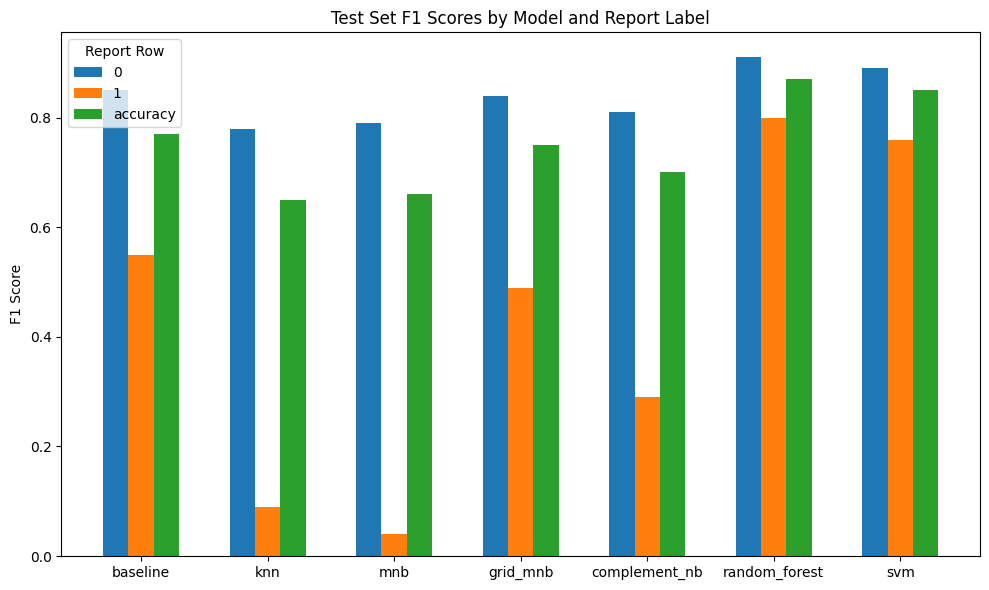

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Define which row labels from test_report we want to extract
# (for example, the f1-scores for class "0", "1", and the average scores)
labels_to_extract = ["0", "1","accuracy"]

# Get a list of model names from the results dictionary
model_names = list(results.keys())

# Prepare a dictionary to store f1-scores for each row label across models
f1_scores = {label: [] for label in labels_to_extract}

# Loop through each model and extract the f1-score from its test_report
for model_name in model_names:
    # Get the test_report DataFrame for the model
    test_report_df = results[model_name]["test_report"]
    # For each desired label, extract the f1-score (if available)
    for label in labels_to_extract:
        row = test_report_df[test_report_df["label"] == label]
        if not row.empty:
            # Convert the f1-score to float in case it is a string
            score = float(row["f1-score"].values[0])
        else:
            score = np.nan
        f1_scores[label].append(score)

# Create a grouped bar chart:
# - x-axis: the different models
# - Within each model group: one bar per extracted row label
x = np.arange(len(model_names))  # positions for each model group
width = 0.2  # width of each individual bar

fig, ax = plt.subplots(figsize=(10, 6))

num_labels = len(labels_to_extract)
for i, label in enumerate(labels_to_extract):
    # Compute an offset so that bars for different labels don't overlap
    offset = (i - (num_labels - 1) / 2) * width
    ax.bar(x + offset, f1_scores[label], width, label=label)

ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylabel("F1 Score")
ax.set_title("Test Set F1 Scores by Model and Report Label")
ax.legend(title="Report Row")

plt.tight_layout()
plt.show()


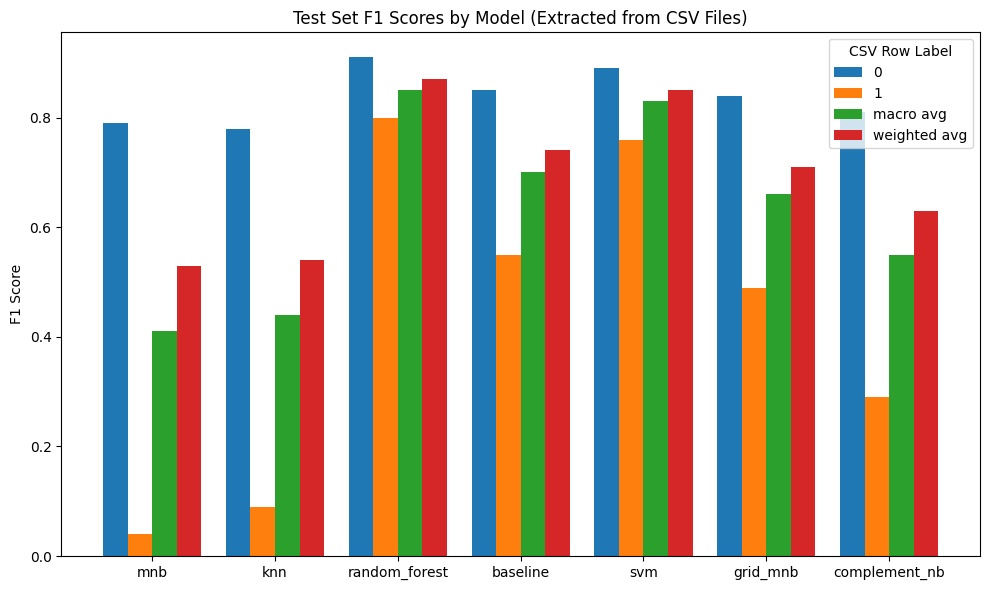

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Define the directory that contains model folders
results_dir = "results"

# List all subdirectories (each representing a model)
model_names = [d for d in os.listdir(results_dir) if os.path.isdir(os.path.join(results_dir, d))]

# Define the row labels from the CSV that we want to extract f1 scores from
labels_to_extract = ["0", "1", "macro avg", "weighted avg"]

# Prepare a dictionary to store f1-scores for each label across models
f1_scores = {label: [] for label in labels_to_extract}
models_with_data = []  # To keep track of models for which we successfully read data

# Loop over each model directory and read its test_report.csv file
for model in model_names:
    test_report_path = os.path.join(results_dir, model, "test_report.csv")
    if os.path.exists(test_report_path):
        df = pd.read_csv(test_report_path)
        # For each desired label, extract the f1-score value
        for label in labels_to_extract:
            row = df[df["label"] == label]
            if not row.empty:
                try:
                    score = float(row["f1-score"].values[0])
                except Exception as e:
                    print(f"Error converting f1-score for model {model} and label {label}: {e}")
                    score = np.nan
            else:
                score = np.nan
            f1_scores[label].append(score)
        models_with_data.append(model)
    else:
        print(f"File {test_report_path} does not exist.")

# Create a grouped bar chart
x = np.arange(len(models_with_data))  # x locations for each model
width = 0.2  # width of each bar
fig, ax = plt.subplots(figsize=(10, 6))

num_labels = len(labels_to_extract)
for i, label in enumerate(labels_to_extract):
    # Compute an offset for each label so that bars don't overlap
    offset = (i - (num_labels - 1) / 2) * width
    ax.bar(x + offset, f1_scores[label], width, label=label)

ax.set_xticks(x)
ax.set_xticklabels(models_with_data)
ax.set_ylabel("F1 Score")
ax.set_title("Test Set F1 Scores by Model (Extracted from CSV Files)")
ax.legend(title="CSV Row Label")
plt.tight_layout()
plt.show()
